##The Battle of the Neighborhoods - Week 1

#Introduction & Business Problem :
A group of investors is exploring cities in the southern US State of Texas for their potential to successfully support a Latin American restaurant franchise.

Problem Background:
The City of Houston, is one of the most populous city in the state of Texas. It is diverse and has a large population of Latin America origin inhabitants. Texas State is famous for their business friendly environment and It provides lot of opportunities. It has attracted many different players into the market. It is a global hub of business and commerce. The city is a major center for Oil & Gas, banking and finance, retailing, world trade, real estate, advertising, legal services, accountancy and engineering. This also translates into a highly competitive business environment. 


Problem Description:
We need to help a pool of potential inventors, about the best location to open a Latin American Food Restaurant in the City of Houston. The city has a large pool of potential patrons, and it’s relatively large Latino population could make opening a Latin Restaurant a promising business opportunity; nevertheless due to its geographical extension and disparity of incomes among its population. Makes the restaurant location choice, a key factor for the restaurant commercial viability.

So it is evident that to survive in such market, it is very important to strategically plan the best possible location for the venue. Various factors need to be studied in order to decide on the Location such as :
1.	Houston Population
2.	Houston  Demographics
3.	Are there any venues like Gyms, Entertainment zones, Parks, malls, Offices nearby where floating population is high etc.
4.	Who are the competitors in that location?
5.	Cuisine served / Menu of the competitors
6.	Segmentation of the neighbourhood

Target Audience:
The target audience for this new restaurant was identified to be Latino Houston residents. To recommend the correct location, is key to identify the neighbourhoods with the highest number of Latino population.

Success Criteria:
The success criteria of the project will be a good recommendation of neighbourhood choice to Group of investors, based on the relative scarcity of similar restaurants in that location, and the potential size of the Latin Population (target market) in the targeted neighbourhoods.



Data :
One city will be analysed in this project : Houston.

We will be using the below datasets for analysing Houston

Data 1 : Neighbourhood has a total of 88 neighbourhoods. In order to segment the neighbourhoods and explore them, we will essentially need a dataset that contains the 88 Houston’s neighbourhoods as well as the coordinates (latitude and longitude) for each of them.
This dataset exists for free on the web. Link to the dataset is : https://en.wikipedia.org/wiki/List_of_Houston_neighborhoods

Data 2 : For the required analysis we will get data from following sources as given below :
1.	Houston Neighbourhoods: : https://opendata.arcgis.com/datasets/f50cc53c15bf4fb3940ab6e8c2534f3d_2.csv
2.	Houston Demographics https://en.wikipedia.org/wiki/Demographics_of_Houston
3.	Houston Hispanic Population by neighbourhood: https://opendata.arcgis.com/datasets/f50cc53c15bf4fb3940ab6e8c2534f3d_2.csv
4.	Houston Income (including Hispanics) data:http://www.houstontx.gov/planning/Demographics/docs_pdfs/SN/Median_Household_Income_by_SN.pdf
(replaced the originally proposed source due to be more recent https://opendata.arcgis.com/datasets/35ef9379a9fd491aab08cb63aa33893e_1.csv )

Data 3 : Houston geographical coordinates data will be sourced from Feocoder packag and will be utilized as input for the Foursquare API, that will be leveraged to provision venues information for each neighbourhood. We will use the Foursquare API to explore neighbourhoods in Houston. The below is image of the Foursquare API data. Additionally we will be using Geocoder Folium & Bautiful Soup to facilitate the attribution of coordinates on data sourced from the 2010 Census database (GIS).



In [13]:
# Install Geocoder Folium & Beautiful Soup
import sys
!{sys.executable} -m pip install geocoder
!{sys.executable} -m pip install folium

#!conda install -c conda-forge geopy --yes
print('Packages installed.')

     |████████████████████████████████| 102kB 2.7MB/s ta 0:00:011
     |████████████████████████████████| 829kB 5.5MB/s eta 0:00:01     |██████████████████████████▉     | 696kB 5.5MB/s eta 0:00:01
     |████████████████████████████████| 92kB 4.2MB/s eta 0:00:011
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Packages installed.


In [15]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install geopy

     |████████████████████████████████| 112kB 5.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [59]:
import numpy as np 
import pandas as pd 
import requests 
from sklearn.cluster import KMeans
import folium 
from bs4 import BeautifulSoup # library to parse HTML and XML documents
import os
import matplotlib.cm as cm
import matplotlib.colors as colors
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates
#import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

print('Packages installed.')

Packages installed.


In [2]:
# Getting USA 2010 census data for obtaining the population etnicity per Houston Neighborhood

Demog_df = pd.read_csv('https://opendata.arcgis.com/datasets/f50cc53c15bf4fb3940ab6e8c2534f3d_2.csv')

Demog_df.head()

,OBJECTID,SUM_POP100,SUM_HU100,SUM_TotPop,SUM_HispPop,SUM_NonHispPop,SUM_NHOneRace,SUM_NH_White,SUM_NH_Black,SUM_NH_AmInd,...,SUM_VAP_HawPac,SUM_VAP_NH_Oth,SUM_VAP_NH_2or,SUM_TotHousing,SUM_OccHU,SUM_VacantHU,Shapearea,Shapelen,POLYID,Name
0,1,3881,2104,3881,711,3170,3091,1353,1396,11,...,1,7,49,2104,1978,126,1.296982e+07,16572.026024,60,FOURTH WARD
1,2,13471,5120,13471,10603,2868,2798,1063,1623,21,...,1,6,48,5120,4406,714,8.040472e+07,43118.770016,63,SECOND WARD
2,3,16716,3664,16716,3266,13450,13347,6092,6562,29,...,1,306,88,3664,2921,743,7.550023e+07,39256.387491,61,DOWNTOWN
3,4,2497,1133,2497,603,1894,1880,15,1853,5,...,0,1,11,1133,940,193,7.655352e+07,59784.697729,59,CLINTON PARK TRI-COMMUNITY
4,5,49277,31563,49277,7311,41966,41129,34063,2291,69,...,10,113,617,31563,27432,4131,2.297921e+08,75759.390142,21,GREATER UPTOWN


In [3]:
#Replacing the filed 'Name' for 'Neighborhood' in the dataset.
Demog_df.rename(columns={'Name':'Neighborhood'},inplace=True)

Demog_df.head(88)

,OBJECTID,SUM_POP100,SUM_HU100,SUM_TotPop,SUM_HispPop,SUM_NonHispPop,SUM_NHOneRace,SUM_NH_White,SUM_NH_Black,SUM_NH_AmInd,...,SUM_VAP_HawPac,SUM_VAP_NH_Oth,SUM_VAP_NH_2or,SUM_TotHousing,SUM_OccHU,SUM_VacantHU,Shapearea,Shapelen,POLYID,Neighborhood
0,1,3881,2104,3881,711,3170,3091,1353,1396,11,...,1,7,49,2104,1978,126,1.296982e+07,16572.026024,60,FOURTH WARD
1,2,13471,5120,13471,10603,2868,2798,1063,1623,21,...,1,6,48,5120,4406,714,8.040472e+07,43118.770016,63,SECOND WARD
2,3,16716,3664,16716,3266,13450,13347,6092,6562,29,...,1,306,88,3664,2921,743,7.550023e+07,39256.387491,61,DOWNTOWN
3,4,2497,1133,2497,603,1894,1880,15,1853,5,...,0,1,11,1133,940,193,7.655352e+07,59784.697729,59,CLINTON PARK TRI-COMMUNITY
4,5,49277,31563,49277,7311,41966,41129,34063,2291,69,...,10,113,617,31563,27432,4131,2.297921e+08,75759.390142,21,GREATER UPTOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,39031,19959,39031,8992,30039,29345,19291,7436,76,...,19,63,452,19959,17506,2453,1.875152e+08,63745.299881,18,BRIARFOREST AREA
84,85,28957,19231,28957,5738,23219,22701,19810,1109,48,...,14,59,386,19231,17069,2162,9.116550e+07,38737.329066,24,NEARTOWN - MONTROSE
85,86,45294,20069,45294,5951,39343,38530,30868,2575,81,...,17,64,492,20069,18264,1805,2.753121e+08,131791.417830,16,MEMORIAL
86,87,31352,12350,31352,18051,13301,13031,9669,1510,61,...,17,50,163,12350,10765,1585,2.290214e+08,96562.357548,10,SPRING BRANCH WEST


In [5]:
# define a function to get coordinates
def get_latlng(Neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Houston, USA'.format(Neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords



In [6]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in Demog_df["Neighborhood"].tolist() ]

In [7]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
coords_df = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [8]:
#Include the coordinates in the dataframe
# merge the coordinates into the original dataframe
Demog_df['Latitude'] = coords_df['Latitude']
Demog_df['Longitude'] = coords_df['Longitude']

Demog_df.head(88)

,OBJECTID,SUM_POP100,SUM_HU100,SUM_TotPop,SUM_HispPop,SUM_NonHispPop,SUM_NHOneRace,SUM_NH_White,SUM_NH_Black,SUM_NH_AmInd,...,SUM_VAP_NH_2or,SUM_TotHousing,SUM_OccHU,SUM_VacantHU,Shapearea,Shapelen,POLYID,Neighborhood,Latitude,Longitude
0,1,3881,2104,3881,711,3170,3091,1353,1396,11,...,49,2104,1978,126,1.296982e+07,16572.026024,60,FOURTH WARD,29.75762,-95.38449
1,2,13471,5120,13471,10603,2868,2798,1063,1623,21,...,48,5120,4406,714,8.040472e+07,43118.770016,63,SECOND WARD,29.74848,-95.32843
2,3,16716,3664,16716,3266,13450,13347,6092,6562,29,...,88,3664,2921,743,7.550023e+07,39256.387491,61,DOWNTOWN,29.75595,-95.35679
3,4,2497,1133,2497,603,1894,1880,15,1853,5,...,11,1133,940,193,7.655352e+07,59784.697729,59,CLINTON PARK TRI-COMMUNITY,29.74322,-95.25751
4,5,49277,31563,49277,7311,41966,41129,34063,2291,69,...,617,31563,27432,4131,2.297921e+08,75759.390142,21,GREATER UPTOWN,29.76015,-95.47671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,39031,19959,39031,8992,30039,29345,19291,7436,76,...,452,19959,17506,2453,1.875152e+08,63745.299881,18,BRIARFOREST AREA,29.74768,-95.57424
84,85,28957,19231,28957,5738,23219,22701,19810,1109,48,...,386,19231,17069,2162,9.116550e+07,38737.329066,24,NEARTOWN - MONTROSE,29.74280,-95.39723
85,86,45294,20069,45294,5951,39343,38530,30868,2575,81,...,492,20069,18264,1805,2.753121e+08,131791.417830,16,MEMORIAL,29.77263,-95.57129
86,87,31352,12350,31352,18051,13301,13031,9669,1510,61,...,163,12350,10765,1585,2.290214e+08,96562.357548,10,SPRING BRANCH WEST,29.80110,-95.54933


In [9]:
# Dropping all unncessary fields
Demog_df.drop(['SUM_POP100', 'SUM_HU100', 'SUM_NHOneRace','SUM_NH_White','SUM_NH_Black','SUM_NH_AmInd','SUM_NH_Asian','SUM_NH_HawPacI','SUM_NH_Other','SUM_NH_2orMore','SUM_VAP_TotPop','SUM_VAP_HispPo','SUM_VAP_NonHis','SUM_VAP_NHOneR','SUM_VAP_NH_Whi','SUM_VAP_NH_Bla','SUM_VAP_NH_AmI','SUM_VAP_NH_Asi','SUM_VAP_HawPac','SUM_VAP_NH_Oth','SUM_VAP_NH_2or','Shapearea','Shapelen'], axis=1)

,OBJECTID,SUM_TotPop,SUM_HispPop,SUM_NonHispPop,SUM_TotHousing,SUM_OccHU,SUM_VacantHU,POLYID,Neighborhood,Latitude,Longitude
0,1,3881,711,3170,2104,1978,126,60,FOURTH WARD,29.75762,-95.38449
1,2,13471,10603,2868,5120,4406,714,63,SECOND WARD,29.74848,-95.32843
2,3,16716,3266,13450,3664,2921,743,61,DOWNTOWN,29.75595,-95.35679
3,4,2497,603,1894,1133,940,193,59,CLINTON PARK TRI-COMMUNITY,29.74322,-95.25751
4,5,49277,7311,41966,31563,27432,4131,21,GREATER UPTOWN,29.76015,-95.47671
...,...,...,...,...,...,...,...,...,...,...,...
83,84,39031,8992,30039,19959,17506,2453,18,BRIARFOREST AREA,29.74768,-95.57424
84,85,28957,5738,23219,19231,17069,2162,24,NEARTOWN - MONTROSE,29.74280,-95.39723
85,86,45294,5951,39343,20069,18264,1805,16,MEMORIAL,29.77263,-95.57129
86,87,31352,18051,13301,12350,10765,1585,10,SPRING BRANCH WEST,29.80110,-95.54933


In [10]:
#Initilizing Foursquare session:

CLIENT_ID = 'BNHS4Y4BKWGLP4DGK5NN3NDXK3MK310IXOBBFNDRUEOCCL4D' # your Foursquare ID
CLIENT_SECRET = 'FXNPOQJUJPKPZETGLNB5E0QOP3LF3YGHPI2B33KG4YQ3VCAG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: BNHS4Y4BKWGLP4DGK5NN3NDXK3MK310IXOBBFNDRUEOCCL4D
CLIENT_SECRET:FXNPOQJUJPKPZETGLNB5E0QOP3LF3YGHPI2B33KG4YQ3VCAG


In [11]:
neighborhood_name = Demog_df.loc[0, 'Neighborhood'] # neighborhood name
neighborhood_latitude = Demog_df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Demog_df.loc[0, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

Latitude and longitude values of FOURTH WARD are 29.75762000000003, -95.38448999999997.


'https://api.foursquare.com/v2/venues/explore?&client_id=BNHS4Y4BKWGLP4DGK5NN3NDXK3MK310IXOBBFNDRUEOCCL4D&client_secret=FXNPOQJUJPKPZETGLNB5E0QOP3LF3YGHPI2B33KG4YQ3VCAG&v=20180605&ll=29.75762000000003,-95.38448999999997&radius=500&limit=100'

In [12]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
    
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
Houston_venues = getNearbyVenues(names=Demog_df['Neighborhood'],
                                   latitudes=Demog_df['Latitude'],
                                   longitudes=Demog_df['Longitude']
                                  )


Your credentails:
CLIENT_ID: BNHS4Y4BKWGLP4DGK5NN3NDXK3MK310IXOBBFNDRUEOCCL4D
CLIENT_SECRET:FXNPOQJUJPKPZETGLNB5E0QOP3LF3YGHPI2B33KG4YQ3VCAG
FOURTH WARD
SECOND WARD
DOWNTOWN
CLINTON PARK TRI-COMMUNITY
GREATER UPTOWN
GREATER INWOOD
GREATER HOBBY AREA
GOLFCREST / BELLFORT / REVEILLE
ELDRIDGE / WEST OAKS
WASHINGTON AVENUE COALITION / MEMORIAL PARK
GREATER FIFTH WARD
DENVER HARBOR / PORT HOUSTON
PLEASANTVILLE AREA
NORTHSHORE
LAZY BROOK / TIMBERGROVE
GREATER HEIGHTS
KASHMERE GARDENS
MINNETEX
NORTHSIDE VILLAGE
SPRING BRANCH EAST
SPRING BRANCH NORTH
EL DORADO / OATES PRAIRIE
SPRING BRANCH CENTRAL
HUNTERWOOD
SETTEGAST
LANGWOOD
INDEPENDENCE HEIGHTS
CENTRAL NORTHWEST
TRINITY / HOUSTON GARDENS
CARVERDALE
EASTEX - JENSEN AREA
EAST HOUSTON
ACRES HOME
NORTHSIDE/NORTHLINE
HIDDEN VALLEY
EAST LITTLE YORK / HOMESTEAD
WILLOWBROOK
GREATER GREENSPOINT
IAH / AIRPORT AREA
KINGWOOD AREA
LAKE HOUSTON
FAIRBANKS / NORTHWEST CROSSING
WESTBRANCH
SHARPSTOWN
WESTWOOD
FORT BEND / HOUSTON
FONDREN GARDENS
SOUTH BELT / 

In [16]:
Houston_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,FOURTH WARD,29.75762,-95.38449,Paper Street Crossfit,29.757435,-95.385846,Gym
1,FOURTH WARD,29.75762,-95.38449,Lucio's BYOB,29.758326,-95.385591,Bar
2,FOURTH WARD,29.75762,-95.38449,Extreme Custom & Classic Cars,29.757708,-95.385589,Auto Garage
3,FOURTH WARD,29.75762,-95.38449,Pat Greer's Kitchen,29.755708,-95.387013,Vegetarian / Vegan Restaurant
4,FOURTH WARD,29.75762,-95.38449,Reflection Pool,29.759820,-95.383963,Park


In [17]:
Houston_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ACRES HOME,1,1,1,1,1,1
AFTON OAKS / RIVER OAKS AREA,2,2,2,2,2,2
ALIEF,2,2,2,2,2,2
ASTRODOME AREA,7,7,7,7,7,7
BRAEBURN,4,4,4,4,4,4
...,...,...,...,...,...,...
WESTBURY,10,10,10,10,10,10
WESTCHASE,4,4,4,4,4,4
WESTWOOD,10,10,10,10,10,10


In [18]:
Houston_venues['Venue Category'].unique()[:50]

array(['Gym', 'Bar', 'Auto Garage', 'Vegetarian / Vegan Restaurant',
       'Park', 'Mexican Restaurant', 'Fried Chicken Joint', 'Record Shop',
       'Track', 'Baseball Stadium', 'Hotel', 'Steakhouse', 'Sports Bar',
       'Italian Restaurant', 'Clothing Store', 'Taco Place',
       'Cajun / Creole Restaurant', 'BBQ Joint', 'Comic Shop',
       'Vietnamese Restaurant', 'Beer Garden', 'Coffee Shop',
       'Playground', 'French Restaurant', 'Music Venue', 'Gastropub',
       'Peruvian Restaurant', 'Salon / Barbershop', 'Yoga Studio',
       'Breakfast Spot', 'Mediterranean Restaurant', 'Dog Run', 'Bank',
       'Fast Food Restaurant', 'Pharmacy', 'Spa', 'Gift Shop',
       'Liquor Store', 'Gas Station', 'Home Service', 'Pizza Place',
       'Ice Cream Shop', 'Wings Joint', 'Mobile Phone Shop',
       'Chinese Restaurant', 'Kids Store', 'Hardware Store', 'Arcade',
       'Shipping Store', 'Grocery Store'], dtype=object)

In [19]:
Houston_onehot = pd.get_dummies(Houston_venues[['Venue Category']], prefix="", prefix_sep="")
Houston_onehot.insert(loc=0, column='Neighborhood', value=Houston_venues['Neighborhood'] )
Houston_onehot.shape

(697, 195)

In [20]:
Houston_grouped = Houston_onehot.groupby('Neighborhood').mean().reset_index()
Houston_grouped.head(88)

,Neighborhood,Adult Boutique,African Restaurant,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio,Zoo Exhibit
0,ACRES HOME,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,AFTON OAKS / RIVER OAKS AREA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,ALIEF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,ASTRODOME AREA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,BRAEBURN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,WESTBURY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
78,WESTCHASE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
79,WESTWOOD,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
80,WILLOW MEADOWS / WILLOWBEND AREA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Houston_grouped['Neighborhood']

for ind in np.arange(Houston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Houston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(88)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ACRES HOME,Discount Store,Zoo Exhibit,Donut Shop,Food,Flower Shop,Flea Market,Financial or Legal Service,Filipino Restaurant,Fast Food Restaurant,Eye Doctor
1,AFTON OAKS / RIVER OAKS AREA,Public Art,Shop & Service,Cosmetics Shop,Cupcake Shop,Flea Market,Financial or Legal Service,Filipino Restaurant,Fast Food Restaurant,Eye Doctor,Electronics Store
2,ALIEF,Football Stadium,Pool,Zoo Exhibit,Dog Run,Flea Market,Financial or Legal Service,Filipino Restaurant,Fast Food Restaurant,Eye Doctor,Electronics Store
3,ASTRODOME AREA,Food Truck,Pizza Place,Chinese Restaurant,Auto Garage,Moving Target,Business Service,Zoo Exhibit,Dry Cleaner,Flower Shop,Flea Market
4,BRAEBURN,Supplement Shop,Thrift / Vintage Store,Pizza Place,Sandwich Place,Flea Market,Financial or Legal Service,Filipino Restaurant,Fast Food Restaurant,Eye Doctor,Electronics Store
...,...,...,...,...,...,...,...,...,...,...,...
77,WESTBURY,Discount Store,Coffee Shop,Tennis Court,Theater,Dive Bar,Liquor Store,Salon / Barbershop,Spa,Hardware Store,Pizza Place
78,WESTCHASE,IT Services,Korean Restaurant,Pizza Place,Medical Supply Store,Zoo Exhibit,Dog Run,Flea Market,Financial or Legal Service,Filipino Restaurant,Fast Food Restaurant
79,WESTWOOD,Fast Food Restaurant,Chinese Restaurant,African Restaurant,Flea Market,Filipino Restaurant,Office,Discount Store,Sandwich Place,BBQ Joint,Dog Run
80,WILLOW MEADOWS / WILLOWBEND AREA,Business Service,Food Truck,Soccer Stadium,Zoo Exhibit,Flea Market,Financial or Legal Service,Filipino Restaurant,Fast Food Restaurant,Eye Doctor,Electronics Store


In [22]:
#Create a Dataframe with the Restaurant information for peer clustering
Houston_Rest = Houston_grouped[["Neighborhood","Restaurant"]]
Houston_Rest.head()

,Neighborhood,Restaurant
0,ACRES HOME,0.0
1,AFTON OAKS / RIVER OAKS AREA,0.0
2,ALIEF,0.0
3,ASTRODOME AREA,0.0
4,BRAEBURN,0.0


In [23]:
##Cluster Neighborhoods
## Run k-means to cluster the neighborhoods in Houston into 3 clusters.

# set number of clusters
kclusters = 3

Houston_clustering = Houston_Rest.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Houston_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [24]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
Hou_rest_merged = Houston_Rest.copy()

# add clustering labels
Hou_rest_merged["Cluster Labels"] = kmeans.labels_
Hou_rest_merged.head()

,Neighborhood,Restaurant,Cluster Labels
0,ACRES HOME,0.0,0
1,AFTON OAKS / RIVER OAKS AREA,0.0,0
2,ALIEF,0.0,0
3,ASTRODOME AREA,0.0,0
4,BRAEBURN,0.0,0


In [25]:
# merge Houston_rest_merged with Demog_df data to add latitude/longitude for each neighborhood for our clustered data
Hou_rest_merged = Hou_rest_merged.join(Demog_df.set_index("Neighborhood"), on="Neighborhood")

print(Hou_rest_merged.shape)
Hou_rest_merged.head() # check the last columns!

(82, 36)


,Neighborhood,Restaurant,Cluster Labels,OBJECTID,SUM_POP100,SUM_HU100,SUM_TotPop,SUM_HispPop,SUM_NonHispPop,SUM_NHOneRace,...,SUM_VAP_NH_Oth,SUM_VAP_NH_2or,SUM_TotHousing,SUM_OccHU,SUM_VacantHU,Shapearea,Shapelen,POLYID,Latitude,Longitude
0,ACRES HOME,0.0,0,33,24465,9288,24465,4782,19683,19525,...,18,96,9288,8434,854,2.497675e+08,87815.579415,6,29.87016,-95.43536
1,AFTON OAKS / RIVER OAKS AREA,0.0,0,83,14007,8069,14007,1352,12655,12520,...,8,80,8069,7107,962,1.006677e+08,63736.498437,23,29.75190,-95.43286
2,ALIEF,0.0,0,53,102235,35498,102235,47966,54269,52936,...,122,847,35498,31612,3886,3.941217e+08,94862.715055,25,29.71088,-95.59569
3,ASTRODOME AREA,0.0,0,61,17697,11311,17697,1840,15857,15430,...,41,356,11311,9715,1596,8.859512e+07,49215.228227,34,29.69150,-95.38869
4,BRAEBURN,0.0,0,58,19341,8216,19341,11194,8147,7964,...,26,117,8216,6979,1237,6.790817e+07,47833.623413,30,29.67839,-95.51126


Now, let's visualize the resulting clusters

In [26]:

# create map
map_clusters = folium.Map(location=[29.749907, -95.358421], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Hou_rest_merged['Latitude'], Hou_rest_merged['Longitude'], Hou_rest_merged['Neighborhood'], Hou_rest_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [28]:
# Lets save the map as HTML file
map_clusters.save('HOURest_map_clusters.html')

In [29]:
# Now let's analize the Latino population by neighborhoods in Houston

HouPop = Hou_rest_merged.sort_values('SUM_HispPop', ascending=False)
HouPop.head(10)

,Neighborhood,Restaurant,Cluster Labels,OBJECTID,SUM_POP100,SUM_HU100,SUM_TotPop,SUM_HispPop,SUM_NonHispPop,SUM_NHOneRace,...,SUM_VAP_NH_Oth,SUM_VAP_NH_2or,SUM_TotHousing,SUM_OccHU,SUM_VacantHU,Shapearea,Shapelen,POLYID,Latitude,Longitude
57,NORTHSIDE/NORTHLINE,0.000000,0,34,58830,18327,58830,48613,10217,10054,...,34,96,18327,16813,1514,2.822489e+08,102420.982348,45,29.85294,-95.38456
2,ALIEF,0.000000,0,53,102235,35498,102235,47966,54269,52936,...,122,847,35498,31612,3886,3.941217e+08,94862.715055,25,29.71088,-95.59569
64,SHARPSTOWN,0.052632,2,44,75724,30285,75724,43244,32480,31627,...,94,560,30285,25636,4649,2.380014e+08,72893.187132,26,29.70126,-95.51798
23,GOLFCREST / BELLFORT / REVEILLE,0.000000,0,8,49757,17530,49757,34780,14977,14786,...,47,124,17530,15549,1981,2.565439e+08,71257.916876,73,29.69516,-95.29816
34,GULFTON,0.000000,0,66,43947,17283,43947,34161,9786,9541,...,46,184,17283,14620,2663,7.895572e+07,48622.412213,27,29.71185,-95.48261
10,CENTRAL SOUTHWEST,0.000000,0,51,60857,19004,60857,31148,29709,29328,...,29,220,19004,17829,1175,6.622565e+08,117635.910570,40,29.62855,-95.43989
66,SOUTH BELT / ELLINGTON,0.000000,0,48,54434,19643,54434,29579,24855,24257,...,68,329,19643,18315,1328,5.790890e+08,161035.331697,80,29.60815,-95.21843
26,GREATER GREENSPOINT,0.000000,0,38,42793,18633,42793,27769,15024,14674,...,42,228,18633,15063,3570,1.938966e+08,117958.271995,2,29.93903,-95.40747
56,NORTHSIDE VILLAGE,0.000000,0,19,26831,9664,26831,22331,4500,4410,...,17,57,9664,8505,1159,1.210498e+08,50141.033029,51,29.78334,-95.35496
51,MID WEST,0.000000,0,76,47958,25981,47958,20794,27164,26341,...,108,618,25981,22631,3350,1.505926e+08,70198.432789,20,29.73217,-95.52337


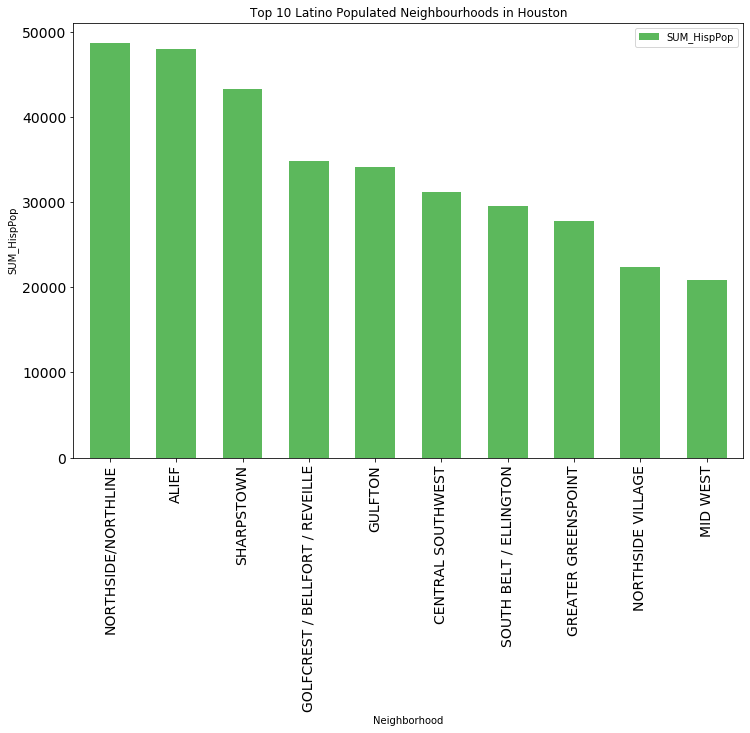

In [30]:
#Lets plot the 10 most highly Latino populated neighborhoods in Houston
import matplotlib as mpl
import matplotlib.pyplot as plt
population_chart = HouPop[['Neighborhood', 'SUM_HispPop']].copy()
top_chart = population_chart.head(10)
top_chart.set_index('Neighborhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='bar', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('SUM_HispPop') # add y-label to the plot
plt.title('Top 10 Latino Populated Neighbourhoods in Houston') # add title to the plot

plt.show()

In [31]:
# Getting the Houston Income Data per Super Neighborhoods from http://www.houstontx.gov/planning/Demographics/docs_pdfs/SN/Median_Household_Income_by_SN.pdf



In [1]:
pip install tabula-py

     |████████████████████████████████| 10.4MB 463kB/s eta 0:00:01    |██▏                             | 706kB 5.1MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tabula
from tabula import read_pdf
import ssl


In [2]:
# Converting the pdf Income data into a CSV 
tabula.convert_into( "http://www.houstontx.gov/planning/Demographics/docs_pdfs/SN/Median_Household_Income_by_SN.pdf", "Median_Household_Income_by_SN1.csv", pages =1, output_format="csv")

Got stderr: Mar 17, 2020 6:12:49 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider loadDiskCache
Mar 17, 2020 6:12:49 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Mar 17, 2020 6:12:51 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Mar 17, 2020 6:12:51 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 17, 2020 6:12:51 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Georgia,Italic are not implemented in PDFBox and will be ignored
Mar 17, 2020 6:13:03 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 17, 2020 6:13:03 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Georgia,Italic are not implemented in PDFBox and will be ignored
Mar 17, 2020 6:13:13 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 17, 2020 6:13:13 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in

In [3]:
tabula.convert_into( "http://www.houstontx.gov/planning/Demographics/docs_pdfs/SN/Median_Household_Income_by_SN.pdf", "Median_Household_Income_by_SN2.csv", pages =2, output_format="csv")

In [4]:
tabula.convert_into( "http://www.houstontx.gov/planning/Demographics/docs_pdfs/SN/Median_Household_Income_by_SN.pdf", "Median_Household_Income_by_SN3.csv", pages =3, output_format="csv")

In [36]:
import pandas as pd 

MHI_SN1DF = pd.read_csv("Median_Household_Income_by_SN1.csv", thousands=',') 
# Preview the first 5 lines of the loaded data 
MHI_SN1DF.head()


,SN #,Unnamed: 1,Super Neighborhood Name,Median Income
0,1,NaN,Willowbrook,"$36,498"
1,2,NaN,Greater Greenspoint,"$27,334"
2,3,NaN,Carverdale,"$56,139"
3,4,NaN,Fairbanks / Northwest Crossing,"$37,278"
4,5,NaN,Greater Inwood,"$39,086"


In [37]:
# Clean the nill fields in the dataframe

MHI_SN1DF.drop(["Unnamed: 1"], axis=1, inplace=True)
MHI_SN1DF.head()


,SN #,Super Neighborhood Name,Median Income
0,1,Willowbrook,"$36,498"
1,2,Greater Greenspoint,"$27,334"
2,3,Carverdale,"$56,139"
3,4,Fairbanks / Northwest Crossing,"$37,278"
4,5,Greater Inwood,"$39,086"


In [38]:
MHI_SN2DF = pd.read_csv("Median_Household_Income_by_SN2.csv", thousands=',') 
# Preview the first 5 lines of the loaded data 
MHI_SN2DF.head()



,SN #,Super Neighborhood Name,Median Income
0,31,Meyerland Area,"$71,479"
1,32,Braeswood,"$82,535"
2,33,Medical Center Area,"$59,497"
3,34,Astrodome Area,"$43,607"
4,35,South Main,"$33,488"


In [39]:
MHI_SN3DF = pd.read_csv("Median_Household_Income_by_SN3.csv", thousands=',') 
# Preview the first 5 lines of the loaded data 
MHI_SN3DF.head()


,SN #,Super Neighborhood Name,Median Income
0,71.0,Sunnyside,"$24,462"
1,72.0,South Park,"$31,589"
2,73.0,Golfcrest / Bellfort / Reveille,"$37,696"
3,74.0,Park Place,"$32,447"
4,75.0,Meadowbrook / Allendale,"$40,775"


In [40]:
MHI_SN1DF = MHI_SN1DF.append(MHI_SN2DF, ignore_index=True)


In [41]:
MHI_SN1DF = MHI_SN1DF.append(MHI_SN3DF, ignore_index=True)
MHI_SN1DF.head(88)

,SN #,Super Neighborhood Name,Median Income
0,1.0,Willowbrook,"$36,498"
1,2.0,Greater Greenspoint,"$27,334"
2,3.0,Carverdale,"$56,139"
3,4.0,Fairbanks / Northwest Crossing,"$37,278"
4,5.0,Greater Inwood,"$39,086"
...,...,...,...
83,84.0,Spring Branch North,"$43,795"
84,85.0,Spring Branch Central,"$36,252"
85,86.0,Spring Branch East,"$43,397"
86,87.0,Greenway / Upper Kirby Area,"$77,323"


In [43]:
# call the function to get the coordinates, store in a new list using list comprehension
coordsInc = [ get_latlng(neighborhood) for neighborhood in MHI_SN1DF ["Super Neighborhood Name"].tolist() ]

# create temporary dataframe to populate the coordinates into Latitude and Longitude
coordsInc_df = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

#Include the coordinates in the dataframe
# merge the coordinates into the original dataframe
MHI_SN1DF['Latitude'] = coordsInc_df['Latitude']
MHI_SN1DF['Longitude'] = coordsInc_df['Longitude']

MHI_SN1DF.head(88)


,SN #,Super Neighborhood Name,Median Income,Latitude,Longitude
0,1.0,Willowbrook,"$36,498",29.75762,-95.38449
1,2.0,Greater Greenspoint,"$27,334",29.74848,-95.32843
2,3.0,Carverdale,"$56,139",29.75595,-95.35679
3,4.0,Fairbanks / Northwest Crossing,"$37,278",29.74322,-95.25751
4,5.0,Greater Inwood,"$39,086",29.76015,-95.47671
...,...,...,...,...,...
83,84.0,Spring Branch North,"$43,795",29.74768,-95.57424
84,85.0,Spring Branch Central,"$36,252",29.74280,-95.39723
85,86.0,Spring Branch East,"$43,397",29.77263,-95.57129
86,87.0,Greenway / Upper Kirby Area,"$77,323",29.80110,-95.54933


In [44]:
MHI_SN1DF = MHI_SN1DF.append(MHI_SN2DF, ignore_index=True)
MHI_SN1DF = MHI_SN1DF.append(MHI_SN3DF, ignore_index=True)
MHI_SN1DF.head(88)


,SN #,Super Neighborhood Name,Median Income,Latitude,Longitude
0,1.0,Willowbrook,"$36,498",29.75762,-95.38449
1,2.0,Greater Greenspoint,"$27,334",29.74848,-95.32843
2,3.0,Carverdale,"$56,139",29.75595,-95.35679
3,4.0,Fairbanks / Northwest Crossing,"$37,278",29.74322,-95.25751
4,5.0,Greater Inwood,"$39,086",29.76015,-95.47671
...,...,...,...,...,...
83,84.0,Spring Branch North,"$43,795",29.74768,-95.57424
84,85.0,Spring Branch Central,"$36,252",29.74280,-95.39723
85,86.0,Spring Branch East,"$43,397",29.77263,-95.57129
86,87.0,Greenway / Upper Kirby Area,"$77,323",29.80110,-95.54933


In [48]:
#Standarizing the neighborhoods names into uppercase for facilitationg joining dataframes
MHI_SN1DF['Super Neighborhood Name'] = MHI_SN1DF['Super Neighborhood Name'].str.upper() 
  
MHI_SN1DF.head()


,SN #,Super Neighborhood Name,Median Income,Latitude,Longitude
0,1.0,WILLOWBROOK,"$36,498",29.75762,-95.38449
1,2.0,GREATER GREENSPOINT,"$27,334",29.74848,-95.32843
2,3.0,CARVERDALE,"$56,139",29.75595,-95.35679
3,4.0,FAIRBANKS / NORTHWEST CROSSING,"$37,278",29.74322,-95.25751
4,5.0,GREATER INWOOD,"$39,086",29.76015,-95.47671


In [49]:
#Standarizing the neighborhoods field name in MHI_SNDF into "Neigborhood" for facilitationg joining dataframes
MHI_SN1DFM = MHI_SN1DF.rename(columns={"Super Neighborhood Name":"Neighborhood"})
MHI_SN1DFM.head(5)

,SN #,Neighborhood,Median Income,Latitude,Longitude
0,1.0,WILLOWBROOK,"$36,498",29.75762,-95.38449
1,2.0,GREATER GREENSPOINT,"$27,334",29.74848,-95.32843
2,3.0,CARVERDALE,"$56,139",29.75595,-95.35679
3,4.0,FAIRBANKS / NORTHWEST CROSSING,"$37,278",29.74322,-95.25751
4,5.0,GREATER INWOOD,"$39,086",29.76015,-95.47671


In [50]:
#Merge the Population and Incomes data in a single dataframe and clean any duplicate records from the merge.
MHI_SN1DFM1 = pd.merge(MHI_SN1DFM, HouPop,  on='Neighborhood', how='outer') 

MHI_SN1DFM1 = MHI_SN1DFM1[pd.notnull(MHI_SN1DFM1['Latitude_x'])]
MHI_SN1DFM1.head(170)

,SN #,Neighborhood,Median Income,Latitude_x,Longitude_x,Restaurant,Cluster Labels,OBJECTID,SUM_POP100,SUM_HU100,...,SUM_VAP_NH_Oth,SUM_VAP_NH_2or,SUM_TotHousing,SUM_OccHU,SUM_VacantHU,Shapearea,Shapelen,POLYID,Latitude_y,Longitude_y
0,1.0,WILLOWBROOK,"$36,498",29.75762,-95.38449,0.000000,0.0,37.0,7020.0,4283.0,...,5.0,75.0,4283.0,3630.0,653.0,8.418865e+07,52713.973865,1.0,29.952400,-95.544640
1,2.0,GREATER GREENSPOINT,"$27,334",29.74848,-95.32843,0.000000,0.0,38.0,42793.0,18633.0,...,42.0,228.0,18633.0,15063.0,3570.0,1.938966e+08,117958.271995,2.0,29.939030,-95.407470
2,3.0,CARVERDALE,"$56,139",29.75595,-95.35679,0.000000,0.0,30.0,3143.0,887.0,...,2.0,10.0,887.0,797.0,90.0,8.401952e+07,56176.319992,3.0,29.849590,-95.542450
3,4.0,FAIRBANKS / NORTHWEST CROSSING,"$37,278",29.74322,-95.25751,0.000000,0.0,42.0,13513.0,6479.0,...,29.0,81.0,6479.0,5502.0,977.0,1.925830e+08,73300.983730,4.0,29.849180,-95.510810
4,5.0,GREATER INWOOD,"$39,086",29.76015,-95.47671,0.000000,0.0,6.0,33973.0,15192.0,...,25.0,172.0,15192.0,11484.0,3708.0,1.864957e+08,113669.038521,5.0,29.869310,-95.480430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,84.0,SPRING BRANCH NORTH,"$43,795",29.74768,-95.57424,0.000000,0.0,21.0,19728.0,8023.0,...,15.0,98.0,8023.0,7238.0,785.0,9.415526e+07,43303.813666,84.0,29.803517,-95.515896
138,85.0,SPRING BRANCH CENTRAL,"$36,252",29.74280,-95.39723,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,86.0,SPRING BRANCH EAST,"$43,397",29.77263,-95.57129,0.000000,0.0,20.0,25564.0,9841.0,...,20.0,108.0,9841.0,8577.0,1264.0,1.704233e+08,57962.345471,86.0,29.807620,-95.480110
142,87.0,GREENWAY / UPPER KIRBY AREA,"$77,323",29.80110,-95.54933,0.033333,2.0,74.0,19931.0,15091.0,...,24.0,258.0,15091.0,12793.0,2298.0,8.273049e+07,48738.213352,87.0,29.732420,-95.441490


In [51]:
#Sort the neighborhoods per Median Income
MHI_SN1DFM1.sort_values(['Median Income'], ascending=False, axis=0, inplace=True)

# get the top 10 highest Median Income neigborhoods in the dataframe
MHI_SN1DFM1_top10 = MHI_SN1DFM1.head(10)

MHI_SN1DFM1_top10.head(170)

,SN #,Neighborhood,Median Income,Latitude_x,Longitude_x,Restaurant,Cluster Labels,OBJECTID,SUM_POP100,SUM_HU100,...,SUM_VAP_NH_Oth,SUM_VAP_NH_2or,SUM_TotHousing,SUM_OccHU,SUM_VacantHU,Shapearea,Shapelen,POLYID,Latitude_y,Longitude_y
56,44.0,LAKE HOUSTON,"$96,869",29.701260,-95.517980,0.000000,0.0,41.0,14529.0,5253.0,...,26.0,129.0,5253.0,4915.0,338.0,9.804367e+08,429584.142108,44.0,30.020270,-95.110510
54,43.0,KINGWOOD AREA,"$95,916",29.839370,-95.553610,0.000000,0.0,40.0,59484.0,24317.0,...,80.0,409.0,24317.0,22680.0,1637.0,8.353594e+08,198374.308987,43.0,30.050405,-95.183156
21,22.0,WASHINGTON AVENUE COALITION / MEMORIAL PARK,"$89,474",29.807480,-95.240520,0.000000,0.0,10.0,26285.0,14911.0,...,38.0,298.0,14911.0,13595.0,1316.0,2.213491e+08,88194.437587,22.0,29.888558,-95.324499
20,21.0,GREATER UPTOWN,"$84,539",29.803517,-95.515896,0.000000,0.0,5.0,49277.0,31563.0,...,113.0,617.0,31563.0,27432.0,4131.0,2.297921e+08,75759.390142,21.0,29.760150,-95.476710
92,62.0,MIDTOWN,"$82,877",29.693880,-95.353010,0.000000,0.0,78.0,8526.0,5568.0,...,22.0,135.0,5568.0,4658.0,910.0,3.468981e+07,27528.497222,62.0,29.741460,-95.376710
32,32.0,BRAESWOOD,"$82,535",29.844770,-95.255830,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,81.0,CLEAR LAKE,"$81,315",29.642620,-95.226860,0.000000,0.0,55.0,56360.0,24182.0,...,54.0,662.0,24182.0,22597.0,1585.0,6.737520e+08,156942.093468,81.0,29.579670,-95.130540
142,87.0,GREENWAY / UPPER KIRBY AREA,"$77,323",29.801100,-95.549330,0.033333,2.0,74.0,19931.0,15091.0,...,24.0,258.0,15091.0,12793.0,2298.0,8.273049e+07,48738.213352,87.0,29.732420,-95.441490
30,31.0,MEYERLAND AREA,"$71,479",29.843980,-95.342880,0.000000,0.0,80.0,19700.0,9361.0,...,37.0,187.0,9361.0,8646.0,715.0,1.145068e+08,53183.902386,31.0,29.679440,-95.473490
23,24.0,NEARTOWN - MONTROSE,"$68,523",29.819610,-95.210380,0.000000,0.0,85.0,28957.0,19231.0,...,59.0,386.0,19231.0,17069.0,2162.0,9.116550e+07,38737.329066,24.0,29.742800,-95.397230


In [52]:
#Extract the required fields from the top 10 listing

MHI_SN1DFM1_T10 = MHI_SN1DFM1_top10[['Neighborhood','Median Income','SUM_HispPop','Latitude_x','Longitude_x','Restaurant','Cluster Labels']].copy()

#MHI_SN1DFM1_T10['Median Income'] = MHI_SN1DFM1_T10['Median Income'].astype(float)
MHI_SN1DFM1_T10.head()

,Neighborhood,Median Income,SUM_HispPop,Latitude_x,Longitude_x,Restaurant,Cluster Labels
56,LAKE HOUSTON,"$96,869",2586.0,29.701260,-95.517980,0.0,0.0
54,KINGWOOD AREA,"$95,916",7093.0,29.839370,-95.553610,0.0,0.0
21,WASHINGTON AVENUE COALITION / MEMORIAL PARK,"$89,474",7890.0,29.807480,-95.240520,0.0,0.0
20,GREATER UPTOWN,"$84,539",7311.0,29.803517,-95.515896,0.0,0.0
92,MIDTOWN,"$82,877",1309.0,29.693880,-95.353010,0.0,0.0


In [53]:
print(MHI_SN1DFM1_T10.dtypes)

Neighborhood       object
Median Income      object
SUM_HispPop       float64
Latitude_x        float64
Longitude_x       float64
Restaurant        float64
Cluster Labels    float64
dtype: object


In [54]:
MHI_SN1DFM1_T10['Median Income_Obj'] = MHI_SN1DFM1_T10['Median Income'].str.replace('$', '').astype(object)
MHI_SN1DFM1_T10['Median Income_Float'] = MHI_SN1DFM1_T10['Median Income_Obj'].str.replace(',', '').astype(float)

MHI_SN1DFM1_T10.dropna(subset=['Median Income_Obj'],inplace=True)

In [55]:
print(MHI_SN1DFM1_T10.dtypes)

Neighborhood            object
Median Income           object
SUM_HispPop            float64
Latitude_x             float64
Longitude_x            float64
Restaurant             float64
Cluster Labels         float64
Median Income_Obj       object
Median Income_Float    float64
dtype: object


In [56]:
# Calculate the potential market size for these top 10 Listing Formula== Median Income x Hispanic population= Potential Market size
MHI_SN1DFM1_T10['PotMktSize'] = MHI_SN1DFM1_T10['Median Income_Float']* MHI_SN1DFM1_T10['SUM_HispPop']
MHI_SN1DFM1_T10 = MHI_SN1DFM1_T10.sort_values(by=['PotMktSize'], ascending=False)
MHI_SN1DFM1_T10.head(10)

,Neighborhood,Median Income,SUM_HispPop,Latitude_x,Longitude_x,Restaurant,Cluster Labels,Median Income_Obj,Median Income_Float,PotMktSize
130,CLEAR LAKE,"$81,315",9623.0,29.642620,-95.226860,0.000000,0.0,"81,315",81315.0,782494245.0
21,WASHINGTON AVENUE COALITION / MEMORIAL PARK,"$89,474",7890.0,29.807480,-95.240520,0.000000,0.0,"89,474",89474.0,705949860.0
54,KINGWOOD AREA,"$95,916",7093.0,29.839370,-95.553610,0.000000,0.0,"95,916",95916.0,680332188.0
20,GREATER UPTOWN,"$84,539",7311.0,29.803517,-95.515896,0.000000,0.0,"84,539",84539.0,618064629.0
23,NEARTOWN - MONTROSE,"$68,523",5738.0,29.819610,-95.210380,0.000000,0.0,"68,523",68523.0,393184974.0
56,LAKE HOUSTON,"$96,869",2586.0,29.701260,-95.517980,0.000000,0.0,"96,869",96869.0,250503234.0
142,GREENWAY / UPPER KIRBY AREA,"$77,323",2620.0,29.801100,-95.549330,0.033333,2.0,"77,323",77323.0,202586260.0
30,MEYERLAND AREA,"$71,479",2756.0,29.843980,-95.342880,0.000000,0.0,"71,479",71479.0,196996124.0
92,MIDTOWN,"$82,877",1309.0,29.693880,-95.353010,0.000000,0.0,"82,877",82877.0,108485993.0
32,BRAESWOOD,"$82,535",NaN,29.844770,-95.255830,NaN,NaN,"82,535",82535.0,NaN


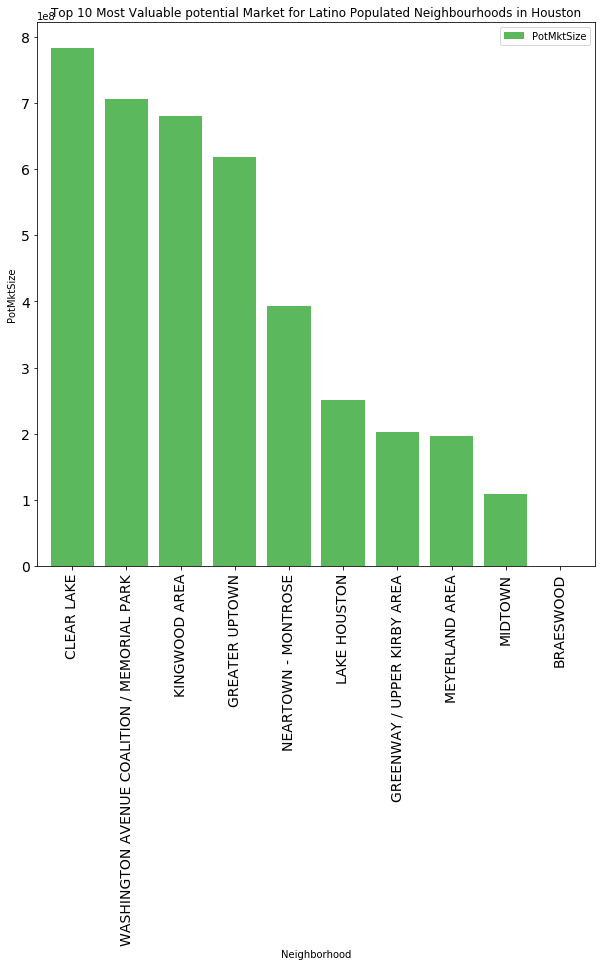

In [57]:
#Lets plot the 10 most highly valuable Market-neighborhoods in Houston
import matplotlib as mpl
import matplotlib.pyplot as plt
population_chart = MHI_SN1DFM1_T10[['Neighborhood', 'PotMktSize']].copy()
top_chart = population_chart.head(10)
top_chart.set_index('Neighborhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='bar', figsize=(10, 10), width=0.8, fontsize=14, color=colors)

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('PotMktSize') # add y-label to the plot
plt.title('Top 10 Most Valuable potential Market for Latino Populated Neighbourhoods in Houston') # add title to the plot



plt.show()



In [64]:

# create map
map_clusters = folium.Map(location=[29.749907, -95.358421], zoom_start=11)

# set color scheme for the clusters
#x = np.arange(kclusters)
#ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(MHI_SN1DFM1_T10['Latitude_x'], MHI_SN1DFM1_T10['Longitude_x'], MHI_SN1DFM1_T10['Neighborhood'], MHI_SN1DFM1_T10['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters
#'Neighborhood','Median Income','SUM_HispPop','Latitude_x','Longitude_x','Restaurant','Cluster Labels'

In [68]:
# Let's Examine the Clusters 
#Cluster 0
MHI_SN1DFM1_T10.loc[MHI_SN1DFM1_T10['Cluster Labels'] == 0].sort_values(by=['PotMktSize'], ascending=False)

,Neighborhood,Median Income,SUM_HispPop,Latitude_x,Longitude_x,Restaurant,Cluster Labels,Median Income_Obj,Median Income_Float,PotMktSize
130,CLEAR LAKE,"$81,315",9623.0,29.642620,-95.226860,0.0,0.0,"81,315",81315.0,782494245.0
21,WASHINGTON AVENUE COALITION / MEMORIAL PARK,"$89,474",7890.0,29.807480,-95.240520,0.0,0.0,"89,474",89474.0,705949860.0
54,KINGWOOD AREA,"$95,916",7093.0,29.839370,-95.553610,0.0,0.0,"95,916",95916.0,680332188.0
20,GREATER UPTOWN,"$84,539",7311.0,29.803517,-95.515896,0.0,0.0,"84,539",84539.0,618064629.0
23,NEARTOWN - MONTROSE,"$68,523",5738.0,29.819610,-95.210380,0.0,0.0,"68,523",68523.0,393184974.0
56,LAKE HOUSTON,"$96,869",2586.0,29.701260,-95.517980,0.0,0.0,"96,869",96869.0,250503234.0
30,MEYERLAND AREA,"$71,479",2756.0,29.843980,-95.342880,0.0,0.0,"71,479",71479.0,196996124.0
92,MIDTOWN,"$82,877",1309.0,29.693880,-95.353010,0.0,0.0,"82,877",82877.0,108485993.0


In [66]:
#Cluster 1
MHI_SN1DFM1_T10.loc[MHI_SN1DFM1_T10['Cluster Labels'] == 1]

,Neighborhood,Median Income,SUM_HispPop,Latitude_x,Longitude_x,Restaurant,Cluster Labels,Median Income_Obj,Median Income_Float,PotMktSize


In [67]:
#Cluster 2
MHI_SN1DFM1_T10.loc[MHI_SN1DFM1_T10['Cluster Labels'] == 2]

,Neighborhood,Median Income,SUM_HispPop,Latitude_x,Longitude_x,Restaurant,Cluster Labels,Median Income_Obj,Median Income_Float,PotMktSize
142,GREENWAY / UPPER KIRBY AREA,"$77,323",2620.0,29.8011,-95.54933,0.033333,2.0,"77,323",77323.0,202586260.0


In [84]:
# Lets analyze the top Three largest Markets on regards to venues

neighborhoods_venues_sorted.loc[(neighborhoods_venues_sorted['Neighborhood'] == "CLEAR LAKE") ]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,CLEAR LAKE,Outdoors & Recreation,Spa,Boutique,Playground,Salon / Barbershop,Doctor's Office,Filipino Restaurant,Fast Food Restaurant,Eye Doctor,Electronics Store


In [86]:
neighborhoods_venues_sorted.loc[(neighborhoods_venues_sorted['Neighborhood'] == "WASHINGTON AVENUE COALITION / MEMORIAL PARK")]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
75,WASHINGTON AVENUE COALITION / MEMORIAL PARK,Auto Garage,Basketball Court,Mexican Restaurant,Video Store,Men's Store,Donut Shop,Flower Shop,Flea Market,Financial or Legal Service,Filipino Restaurant


In [87]:
neighborhoods_venues_sorted.loc[(neighborhoods_venues_sorted['Neighborhood'] == "KINGWOOD AREA")]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
40,KINGWOOD AREA,Pizza Place,Sandwich Place,Fast Food Restaurant,Burger Joint,Coffee Shop,Shipping Store,Chinese Restaurant,Fried Chicken Joint,Pharmacy,Video Store


As per the information analyzed and the Market sizes it seems clear that the Latin American restaurant could be make good business sense in any of the top 3 Superneighborhoods we identified above (CLEAR LAKE, WASHINGTON AVENUE COALITION / MEMORIAL PARK & KINGWOOD AREA). 

Nevertheless, CLEAR LAKE seems to offer a larger potential market with less competition from other Latin American restaurants.

This will be our preferred recomended location for the potential investors in the restaurant.